# Knowledge Base Construction

This notebook demonstrates the process of building a knowledge base system
using LangChain for SQL-related PDF documents. The steps include loading data,
cleaning text, chunking documents, creating embeddings, and creating a FAISS vector database.

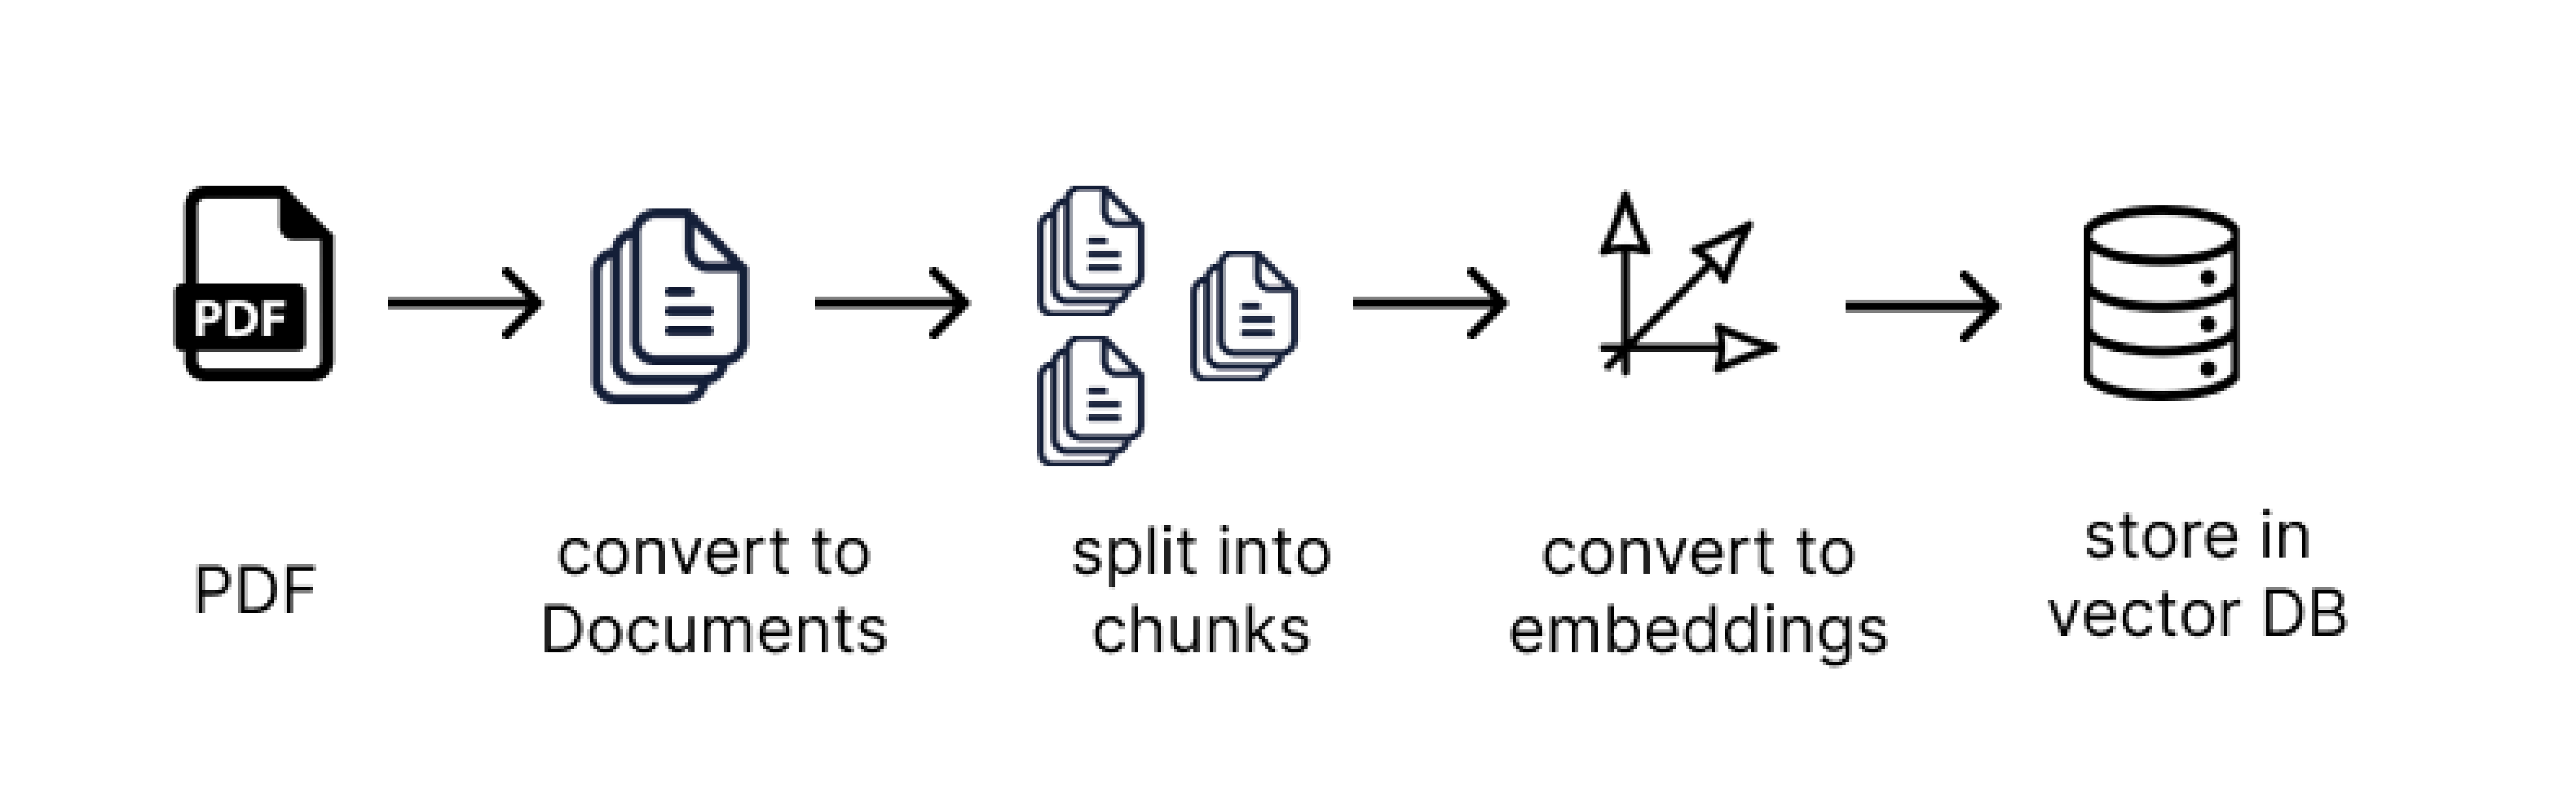

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the data

In [2]:
pip install -U llama-index --upgrade --no-cache-dir --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 227.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 137.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 161.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 179.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 148.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 227.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.9/147.9 kB 241.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 212.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# pip install llama-parse

In [1]:
# import os
# from tqdm import tqdm
# from llama_parse import LlamaParse

# # Apply nest_asyncio to avoid any runtime errors in Jupyter
# import nest_asyncio
# nest_asyncio.apply()

# # Initialize the LlamaParse parser
# parser = LlamaParse(
#     api_key="llx-Fz57JkQQSFdY8kht31V6xWHahuu7uQtZodZjviRATRYzwa5T",  # Replace with your LlamaParse API key
#     result_type="markdown",  # Use "markdown" or "text" as needed
#     num_workers=4,  # Parallelize API calls for multiple files
#     verbose=True,
#     language="fr",  # Set the language to French
# )

# def process_all_pdfs(directory_path):
#     """
#     Process all PDFs in a directory using LlamaParse.

#     Args:
#         directory_path (str): Path to the directory containing PDF files.

#     Returns:
#         list: A list of processed documents with their metadata.
#     """
#     all_documents = []
#     pdf_files = [f for f in os.listdir(directory_path) if f.endswith(".pdf")]

#     print(f"Found {len(pdf_files)} PDF files to process.")

#     for pdf_file in tqdm(pdf_files, desc="Processing PDFs"):
#         pdf_path = os.path.join(directory_path, pdf_file)
#         try:
#             # Parse the PDF file
#             parsed_data = parser.load_data(pdf_path)
#             for doc in parsed_data:
#                 # Add filename metadata for traceability
#                 doc.metadata["source_file"] = pdf_file
#             all_documents.extend(parsed_data)
#         except Exception as e:
#             print(f"Error processing {pdf_file}: {e}")

#     return all_documents


In [2]:
# # Directory containing your PDFs
# pdf_directory = "/content/drive/MyDrive/SQL_PDFs"

# # Process all PDFs and retrieve documents
# processed_documents = process_all_pdfs(pdf_directory)

Found 24 PDF files to process.


Processing PDFs:   0%|          | 0/24 [00:00<?, ?it/s]

Started parsing the file under job_id cdf4a2e1-d54a-4378-81a6-5fc8de339684
..

Processing PDFs:   4%|▍         | 1/24 [00:55<21:16, 55.49s/it]

Started parsing the file under job_id 57c429aa-f5e2-4438-8d01-17bf25371137
................................................................................

Processing PDFs:   8%|▊         | 2/24 [30:58<6:37:20, 1083.66s/it]

Error while parsing the file '/content/drive/MyDrive/SQL_PDFs/DS_102_(SQL)DataServiceGuide_fr.pdf': Job ID: 57c429aa-f5e2-4438-8d01-17bf25371137 failed with status: ERROR, Error code: ERROR_DURING_PROCESSING, Error message: An unknown error occurred during processing. Job id: 57c429aa-f5e2-4438-8d01-17bf25371137
Started parsing the file under job_id 6dbe1d64-4b3c-469b-a2d0-83a94410f61d
.

Processing PDFs:  12%|█▎        | 3/24 [31:32<3:31:28, 604.22s/it] 

Started parsing the file under job_id 7f794a0b-440f-4348-80b0-ba315f77d3b2
...

Processing PDFs:  17%|█▋        | 4/24 [32:41<2:11:01, 393.05s/it]

Started parsing the file under job_id fab1d6ad-b49b-451d-a26e-b870f041cc9b
......

Processing PDFs:  21%|██        | 5/24 [35:19<1:37:31, 307.98s/it]

Started parsing the file under job_id a207ac01-3de6-4868-9d83-2f6cb40fa29f
.......

Processing PDFs:  25%|██▌       | 6/24 [37:59<1:17:20, 257.82s/it]

Started parsing the file under job_id e8971566-8b89-443b-b1bd-905ad0110679


Processing PDFs:  29%|██▉       | 7/24 [38:01<49:21, 174.22s/it]  

Started parsing the file under job_id ee998b44-2fcf-4cfe-b8ff-f7b0183eaaf5


Processing PDFs:  33%|███▎      | 8/24 [38:08<32:16, 121.02s/it]

Started parsing the file under job_id 40935982-c4ce-4859-b9f2-ca8a773406d2


Processing PDFs:  38%|███▊      | 9/24 [38:10<20:58, 83.90s/it] 

Started parsing the file under job_id 3b0affcd-c9c2-47e5-8804-f6a1b05d6959
.............................................................................

Processing PDFs:  42%|████▏     | 10/24 [1:08:17<2:23:40, 615.76s/it]

Error while parsing the file '/content/drive/MyDrive/SQL_PDFs/supportCoursBDR.pdf': Job ID: 3b0affcd-c9c2-47e5-8804-f6a1b05d6959 failed with status: ERROR, Error code: ERROR_DURING_PROCESSING, Error message: An unknown error occurred during processing. Job id: 3b0affcd-c9c2-47e5-8804-f6a1b05d6959
Started parsing the file under job_id ffee5ae8-6fcd-4f1e-88b5-40f3b86e9169


Processing PDFs:  46%|████▌     | 11/24 [1:08:33<1:33:38, 432.19s/it]

Started parsing the file under job_id 17a18f79-e16b-4d02-9cca-26630b78fb65


Processing PDFs:  50%|█████     | 12/24 [1:08:35<1:00:16, 301.36s/it]

Started parsing the file under job_id 89b20ca7-3870-42de-afb5-c79f8c2db1c6


Processing PDFs:  54%|█████▍    | 13/24 [1:08:37<38:37, 210.70s/it]  

Started parsing the file under job_id 3bf35a9a-6c8f-4552-b40c-20235f29609f


Processing PDFs:  58%|█████▊    | 14/24 [1:08:39<24:36, 147.68s/it]

Started parsing the file under job_id edfd9d2e-379b-4a03-a46a-2f23ec6e26b3


Processing PDFs:  62%|██████▎   | 15/24 [1:08:42<15:35, 103.93s/it]

Started parsing the file under job_id 474a7de0-d205-4a33-9523-140a64d70340


Processing PDFs:  67%|██████▋   | 16/24 [1:08:46<09:52, 74.01s/it] 

Started parsing the file under job_id 4d6c05eb-f13f-490b-8ca9-a6aaee91c741
..

Processing PDFs:  71%|███████   | 17/24 [1:09:54<08:23, 71.93s/it]

Started parsing the file under job_id 401953bc-70b3-4888-9d2a-9f2791cc7260


Processing PDFs:  75%|███████▌  | 18/24 [1:10:00<05:13, 52.30s/it]

Started parsing the file under job_id 43f6cead-0acd-49fa-b8ba-b313601e16f0


Processing PDFs:  79%|███████▉  | 19/24 [1:10:05<03:10, 38.02s/it]

Started parsing the file under job_id 2d417120-5e2f-4b1b-ae94-1f784eae1204


Processing PDFs:  83%|████████▎ | 20/24 [1:10:07<01:49, 27.26s/it]

Started parsing the file under job_id 4dbc73d8-8832-4716-83c3-e3d6b7f02816


Processing PDFs:  88%|████████▊ | 21/24 [1:10:09<00:59, 19.72s/it]

Started parsing the file under job_id 7860ad06-7cfc-4f80-b57e-1dd94116d422


Processing PDFs:  92%|█████████▏| 22/24 [1:10:14<00:30, 15.12s/it]

Started parsing the file under job_id d091615a-9098-427e-9310-ea49613bf153


Processing PDFs:  96%|█████████▌| 23/24 [1:10:18<00:11, 11.93s/it]

Started parsing the file under job_id 806926f5-1a6c-407e-975d-6d5a4f1802a0


Processing PDFs: 100%|██████████| 24/24 [1:10:23<00:00, 175.98s/it]


In [3]:
# # Example: Display first 5 processed documents
# for i, doc in enumerate(processed_documents[45:50]):
#     print(f"Document {i + 1}:")
#     print(f"Content: {doc.text}")
#     print(f"Metadata: {doc.metadata}")
#     print("-" * 50)

Document 1:
Content: # SQL SELECT

L’utilisation la plus courante de SQL consiste à lire des données issues de la base de données. Cela s’effectue grâce à la commande SELECT, qui retourne des enregistrements dans un tableau de résultat. Cette commande peut sélectionner une ou plusieurs colonnes d’une table.

# Commande basique

L’utilisation basique de cette commande s’effectue de la manière suivante :

SELECT nom_du_champ
FROM nom_du_tableau

Cette requête va sélectionner (SELECT) le champ « nom_du_champ » provenant (FROM) du tableau appelé « nom_du_tableau ».

# Exemple

Imaginons une base de données appelée « client » qui contient des informations sur les clients d’une entreprise.

# Table « client » :

|identifiant|prenom|nom|ville|
|---|---|---|---|
|1|Pierre|Dupond|Paris|
|2|Sabrina|Durand|Nantes|
|3|Julien|Martin|Lyon|
|4|David|Bernard|Marseille|
|5|Marie|Leroy|Grenoble|

Si l’ont veut avoir la liste de toutes les villes des clients, il suffit d’effectuer la requête suivante :



In [4]:
# processed_documents[:5]

[Document(id_='80480d5b-61f5-4764-a310-32107110cf7f', embedding=None, metadata={'source_file': '20XX-XX.cours.01-introduction.bdd.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text='# Introduction aux Bases de Données\n\n# Organisation du cours\n\n# Introduction aux SGBD\n\n# Modèle Entités/Associations\n\n# Modèle Relationnel\n\nDjamel Berrabah\n\nIntroduction aux BD - 1 / 43', mimetype='text/plain', start_char_idx=None, end_char_idx=None, metadata_seperator='\n', text_template='{metadata_str}\n\n{content}'),
 Document(id_='74ae8ba5-813c-48e2-8c00-66116e26837e', embedding=None, metadata={'source_file': '20XX-XX.cours.01-introduction.bdd.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text='# Objectifs du cours\n\n- Étudier les « bases de données » selon différents points de vue :\n-

In [5]:
# import json

# def save_processed_documents(documents, file_path="/content/drive/MyDrive/processed_documents.json"):
#     """
#     Save processed LlamaParse Document objects to a JSON file.

#     Args:
#         documents (list): List of Document objects.
#         file_path (str): Path to save the JSON file.
#     """
#     with open(file_path, "w", encoding="utf-8") as f:
#         serialized_docs = [
#             {
#                 "id": doc.id_,
#                 "text": doc.text,
#                 "metadata": doc.metadata,
#                 "embedding": doc.embedding,  # Include embedding if present
#                 "mimetype": doc.mimetype,
#                 "start_char_idx": doc.start_char_idx,
#                 "end_char_idx": doc.end_char_idx,
#                 "relationships": doc.relationships,
#                 "excluded_embed_metadata_keys": doc.excluded_embed_metadata_keys,
#                 "excluded_llm_metadata_keys": doc.excluded_llm_metadata_keys,
#                 "metadata_template": doc.metadata_template,
#                 "metadata_separator": doc.metadata_separator,
#                 "text_template": doc.text_template,
#             }
#             for doc in documents
#         ]
#         json.dump(serialized_docs, f, ensure_ascii=False, indent=4)
#     print(f"Processed documents saved to {file_path}")


In [6]:
# save_processed_documents(processed_documents)

Processed documents saved to /content/drive/MyDrive/processed_documents.json


In [10]:
pip install langchain langchain_community pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.7 MB/s eta 0:00:00


In [3]:
import json
from langchain.schema import Document  # Use this if you're working with LangChain

def load_documents_from_json(file_path):
    """
    Load documents from a JSON file and convert them into Document objects.

    Args:
        file_path (str): Path to the JSON file.

    Returns:
        list: List of Document objects.
    """
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)

    documents = []
    for item in data:
        # Create a Document object with all attributes
        doc = Document(
            page_content=item.get("text"),
            metadata=item.get("metadata", {}),
        )
        documents.append(doc)

    return documents

# Example usage
file_path = "/content/drive/MyDrive/processed_documents.json"  # Replace with your actual JSON file path
documents = load_documents_from_json(file_path)

# Display the first few loaded documents
for i, doc in enumerate(documents[:3]):
    print(f"Document {i + 1}:")
    print(f"Text: {doc.page_content}")  # Show a preview of the text
    print(f"Metadata: {doc.metadata}")
    print("-" * 50)


Document 1:
Text: # Introduction aux Bases de Données

# Organisation du cours

# Introduction aux SGBD

# Modèle Entités/Associations

# Modèle Relationnel

Djamel Berrabah

Introduction aux BD - 1 / 43
Metadata: {'source_file': '20XX-XX.cours.01-introduction.bdd.pdf'}
--------------------------------------------------
Document 2:
Text: # Objectifs du cours

- Étudier les « bases de données » selon différents points de vue :
- - utilisateur
- développeur
- administrateur

Comprendre les principes des systèmes de gestion de bases de données (SGBD) relationnels
- Apprendre à construire des applications sur un SGBD : modèles et langages
- Étudier les mécanismes internes des SGBD

Djamel Berrabah

Introduction aux BD - 2 / 43
Metadata: {'source_file': '20XX-XX.cours.01-introduction.bdd.pdf'}
--------------------------------------------------
Document 3:
Text: # Plan général du cours

- Introduction et modélisation BD
- Algèbre relationnelle
- Modèles de données
- Calcul relationnel et lan

## Chunking the Documents

In [3]:
!python -m spacy download fr_core_news_sm  # Download the French model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 96.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
from langchain.text_splitter import MarkdownTextSplitter

def meaningful_markdown_chunking(documents, min_chunk_length=300):
    """
    Chunk documents into meaningful chunks using MarkdownTextSplitter.
    Combine small chunks with their predecessors to ensure context and preserve metadata.

    Args:
        documents (list): List of LangChain Document objects.
        min_chunk_length (int): Minimum length for a chunk to be considered meaningful.

    Returns:
        list: List of new Document objects with combined chunks.
    """
    splitter = MarkdownTextSplitter(chunk_size=1500, chunk_overlap=100)  # Adjust chunk size and overlap as needed
    all_chunks = []

    for doc in documents:
        # Split the document content into markdown-based chunks
        chunks = splitter.create_documents([doc.page_content])

        # Combine chunks smaller than the minimum length with their predecessors
        meaningful_chunks = []
        current_chunk = ""
        current_metadata = doc.metadata  # Initialize with the document's metadata

        for chunk in chunks:
            content = chunk.page_content.strip()

            # Combine small chunks with the previous chunk
            if len(current_chunk) + len(content) < min_chunk_length:
                current_chunk += " " + content
            else:
                # Save the previous chunk if it is meaningful
                if current_chunk:
                    meaningful_chunks.append({"page_content": current_chunk.strip(), "metadata": current_metadata})
                current_chunk = content  # Start a new chunk

        # Save the last chunk if any
        if current_chunk:
            meaningful_chunks.append({"page_content": current_chunk.strip(), "metadata": current_metadata})

        # Convert meaningful chunks back to LangChain Document objects
        for meaningful_chunk in meaningful_chunks:
            new_doc = doc.model_copy()  # Copy the original Document object
            new_doc.page_content = meaningful_chunk["page_content"]  # Update with the chunked text
            new_doc.metadata = meaningful_chunk["metadata"]  # Assign the corresponding metadata
            all_chunks.append(new_doc)

    return all_chunks

# Example usage
chunks = meaningful_markdown_chunking(documents)

# Display the first few meaningful chunks
for i, chunk in enumerate(chunks[:5]):
    print(f"Chunk {i + 1}:")
    print(f"Content: {chunk.page_content}")
    print(f"Metadata: {chunk.metadata}")
    print("-" * 50)


Chunk 1:
Content: # Introduction aux Bases de Données

# Organisation du cours

# Introduction aux SGBD

# Modèle Entités/Associations

# Modèle Relationnel

Djamel Berrabah

Introduction aux BD - 1 / 43
Metadata: {'source_file': '20XX-XX.cours.01-introduction.bdd.pdf'}
--------------------------------------------------
Chunk 2:
Content: # Objectifs du cours

- Étudier les « bases de données » selon différents points de vue :
- - utilisateur
- développeur
- administrateur

Comprendre les principes des systèmes de gestion de bases de données (SGBD) relationnels
- Apprendre à construire des applications sur un SGBD : modèles et langages
- Étudier les mécanismes internes des SGBD

Djamel Berrabah

Introduction aux BD - 2 / 43
Metadata: {'source_file': '20XX-XX.cours.01-introduction.bdd.pdf'}
--------------------------------------------------
Chunk 3:
Content: # Plan général du cours

- Introduction et modélisation BD
- Algèbre relationnelle
- Modèles de données
- Calcul relationnel et lan

In [5]:
len(chunks)

3445

## Embedding & Vector Database Creation

#### Creating and saving the vector database

In [5]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 62.6 MB/s eta 0:00:00


In [6]:
pip install sentence-transformers

In [7]:
pip install langchain_huggingface

In [11]:
import os
from tqdm import tqdm
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.schema import Document

def create_vector_database(documents, save_path, model_name="all-MPNet-base-v2", batch_size=32):
    """
    Create a FAISS vector database from a list of documents, handling problematic texts and ensuring alignment.
    """
    # Initialize the embedding model
    embedding_model = HuggingFaceEmbeddings(model_name=model_name)

    # Prepare valid texts and metadata
    valid_texts = []
    valid_metadata = []
    for i, doc in enumerate(documents):
        try:
            text = doc.page_content.strip()
            if not text:  # Skip empty strings
                print(f"Skipping empty document at index {i}")
                continue
            valid_texts.append(text)
            valid_metadata.append(doc.metadata)
        except Exception as e:
            print(f"\nSkipping problematic document at index {i}: {e}")

    print(f"Number of valid documents: {len(valid_texts)}")

    # Embed texts in batches
    print("\nEmbedding texts in batches...")
    embeddings = []
    aligned_metadata = []  # Keep only metadata for successfully embedded texts
    for i in tqdm(range(0, len(valid_texts), batch_size), desc="Embedding batches"):
        batch_texts = valid_texts[i:i+batch_size]
        batch_metadata = valid_metadata[i:i+batch_size]
        try:
            batch_embeddings = embedding_model.embed_documents(batch_texts)
            embeddings.extend(batch_embeddings)
            aligned_metadata.extend(batch_metadata)
        except Exception as e:
            print(f"\nError embedding batch {i // batch_size}: {e}")

    print(f"Number of successfully embedded texts: {len(embeddings)}")

    # Ensure alignment between embeddings and metadata
    if len(embeddings) != len(aligned_metadata):
        raise ValueError("Misalignment between embeddings and metadata!")

    # Create the FAISS vector database
    print("Creating FAISS vector database...")
    faiss_index = FAISS.from_embeddings(
        text_embeddings=list(zip(valid_texts[:len(embeddings)], embeddings)),
        embedding=embedding_model,
        metadatas=aligned_metadata
    )

    # Save the FAISS index
    print(f"Saving FAISS index to {save_path}...")
    os.makedirs(save_path, exist_ok=True)
    faiss_index.save_local(save_path)

    print("FAISS vector database created and saved successfully.")
    return faiss_index


In [7]:
save_path = "/content/drive/MyDrive/vector_database"
model_name = "all-MPNet-base-v2"
faiss_index = create_vector_database(chunks, save_path, model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Number of valid documents: 3445

Embedding texts in batches...


Embedding batches: 100%|██████████| 108/108 [01:10<00:00,  1.53it/s]


Number of successfully embedded texts: 3445
Creating FAISS vector database...
Saving FAISS index to /content/drive/MyDrive/vector_database...
FAISS vector database created and saved successfully.


# Retrieval

#### Load and Query the FAISS Index

In [12]:
save_path = "/content/drive/MyDrive/vector_database"
model_name = "all-MPNet-base-v2"

# Load the FAISS index
embedding_model = HuggingFaceEmbeddings(model_name=model_name)
loaded_faiss_index = FAISS.load_local(save_path, embedding_model, allow_dangerous_deserialization=True)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [27]:
import re

def filter_irrelevant_chunks(documents, max_dot_ratio=0.5, min_length=30):
    """
    Filter out irrelevant chunks that contain table of contents or excessive dots,
    and exclude short or uninformative chunks.

    Args:
        documents (list): List of retrieved documents (chunks).
        max_dot_ratio (float): The maximum allowed ratio of dots to words for a chunk to be considered relevant.
        min_chunk_length (int): The minimum length for a chunk to be considered informative.
        sql_keywords (list): A list of keywords related to SQL to check if the chunk contains SQL-related content.

    Returns:
        list: Filtered list of relevant documents.
    """
    relevant_chunks = []

    # Define patterns for identifying table of contents or irrelevant sections
    irrelevant_patterns = [
        r"table\s*des\s*matières",  # table of contents
        r"liste\s*des\s*(figures|tables)",  # list of figures or tables
        r"\.{3,}",  # More than 3 consecutive dots (to exclude unnecessary tables of contents)
    ]

    for doc in documents:
        # Step 1: Check if the chunk contains any irrelevant pattern
        text = doc.page_content.strip().lower()

        # If any irrelevant pattern is matched, skip this chunk
        if any(re.search(pattern, text) for pattern in irrelevant_patterns):
            print(f"Skipping chunk with TOC content")
            continue

        # Step 2: Check if the chunk has too many dots (likely a table of contents)
        dot_ratio = text.count('.') / len(text.split())  # Calculate dot ratio
        if dot_ratio > max_dot_ratio:
            print(f"Skipping chunk with TOC content")
            continue

        # Step 3: Check if the chunk is short
        # Split the text into words and check length
        words = doc.page_content.split()

        if len(words) < min_length:
          print(f"Skipping short chunk:")
          continue

        # If the chunk passes all checks, keep it
        relevant_chunks.append(doc)

    return relevant_chunks

In [14]:
from langchain.vectorstores import FAISS

def retrieve_documents_from_faiss(query, faiss_index, k=5):
    """
    Retrieve the top-k relevant documents for a given query from the FAISS index.

    Args:
        query (str): The user's query.
        faiss_index (FAISS): The FAISS index containing the document embeddings.
        k (int): The number of top results to retrieve.

    Returns:
        list: List of relevant documents.
    """
    retriever = faiss_index.as_retriever(search_type="similarity", search_kwargs={"k": k})
    retrieved_docs = retriever.get_relevant_documents(query)
    return retrieved_docs

In [15]:
from transformers import pipeline
import torch

# Load a re-ranker (for simplicity, we use a transformer model for re-ranking)
re_ranker = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

def rerank_documents(query, documents):
    """
    Re-rank the retrieved documents using a re-ranking model.

    Args:
        query (str): The user's query.
        documents (list): List of retrieved documents.

    Returns:
        list: Re-ranked documents.
    """
    re_ranked = []

    for doc in documents:
        # Use a zero-shot classifier to rank documents based on relevance to the query
        result = re_ranker(query, candidate_labels=[doc.page_content])
        score = result['scores'][0]  # Take the relevance score

        # Store document along with its score
        re_ranked.append({"document": doc, "score": score})

    # Sort documents based on score (higher score is more relevant)
    re_ranked.sort(key=lambda x: x['score'], reverse=True)

    # Return the top re-ranked documents
    return [doc["document"] for doc in re_ranked]

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [17]:
def retrieve_and_rerank(query, faiss_index, k=25, top_n=5):
    """
    Retrieve and re-rank documents based on their relevance to a query.

    Args:
        query (str): The user's query in French.
        faiss_index (FAISS): The FAISS vector store.
        k (int): The number of top results to retrieve (set to 25).
        top_n (int): The number of top re-ranked documents to return (set to 5).

    Returns:
        list: Top re-ranked documents.
    """
    # Step 1: Retrieve top-k relevant documents from FAISS index
    retrieved_docs = retrieve_documents_from_faiss(query, faiss_index, k)

    # Step 2: Filter out irrelevant documents (e.g., TOC, excessive dots)
    filtered_docs = filter_irrelevant_chunks(retrieved_docs)

    # Step 3: Re-rank the filtered documents
    re_ranked_docs = rerank_documents(query, filtered_docs)

    # Return the top 'top_n' re-ranked documents
    return re_ranked_docs[:top_n]

In [28]:
query = "le jointure"
re_ranked_docs = retrieve_and_rerank(query, loaded_faiss_index, k=25)

# Display the re-ranked documents
for i, doc in enumerate(re_ranked_docs):
    print(f"----------Ranked Document {i + 1}:---------------")
    print(f"Content: {doc.page_content}")
    print(f"Metadata: {doc.metadata}")
    print("-" * 50)


Skipping short chunk: # Vertigo/CNAM, Paris

# Un PEP

Pas d’index sur les attributs de jointure
Skipping short chunk: # ALGÈBRE RELATIONNELLE
Skipping short chunk: # Qu’est-ce qu’une bonne décomposition ?

- Impact sur les requêtes ? Le temps d’exécution peut augmenter à cause des jointures nouvelles.
Skipping short chunk: # Vertigo/CNAM, Paris

# Un autre PEP

table indexée pour chaque jointure
Skipping chunk with TOC content
Skipping chunk with TOC content
Skipping short chunk: # ALGEBRE RELATIONNELLE

65
Skipping short chunk: # Troisième partie

Il n’y a pas que la sélection dans la vie!

34
Skipping short chunk: # Cours de bases de données

Philippe Rigaux

19 juin 2003
Ranked Document 1:
Content: # Jointure Naturelle

La jointure naturelle est une équijointure dont la condition porte sur l'égalité de valeurs entre tous les attributs de même nom, des relations concernées. Le schéma de la relation résultante correspond à une concaténation de l'ensemble des attributs des deux relati

# Cleaning the retrieved chunks

In [31]:
import re

def clean_chunk_for_question_generation(chunk, min_length):
    """
    Clean the chunk for question generation by removing unnecessary text and ensuring meaningful content.

    Args:
        chunk (str): The chunk of text to be cleaned.
        min_length (int): Minimum length of the chunk to ensure it's meaningful.

    Returns:
        str: Cleaned chunk ready for question generation.
    """
    # Step 1: Normalize whitespace (remove extra spaces, newlines)
    cleaned_text = re.sub(r'[ \t]+', ' ', chunk).strip()

    # Step 2: Remove non-informative filler phrases like "introduction", "summary"
    cleaned_text = re.sub(r'\b(introduction|résumé|summary|conclusion)\b', '', cleaned_text, flags=re.IGNORECASE)

    # Step 3: Ensure minimum content length for meaningful chunk
    if len(cleaned_text.split()) < min_length:
        return None  # Chunk is too short to be meaningful for question generation

    return cleaned_text

def clean_relevant_chunks_for_question_generation(re_ranked_docs, min_chunk_length):
    """
    Clean the re-ranked documents to prepare them for question generation.

    Args:
        re_ranked_docs (list): List of re-ranked documents.
        min_chunk_length (int): Minimum length of the chunk to ensure it's meaningful.

    Returns:
        list: List of cleaned chunks ready for question generation.
    """
    cleaned_chunks = []

    for doc in re_ranked_docs:
        cleaned_chunk = clean_chunk_for_question_generation(doc.page_content, min_chunk_length)
        if cleaned_chunk:  # Only add the chunk if it's not None (meaningful)
            cleaned_chunks.append(cleaned_chunk)

    return cleaned_chunks

cleaned_chunks_for_questions = clean_relevant_chunks_for_question_generation(re_ranked_docs, min_chunk_length=30)

# Display the cleaned chunks
for i, chunk in enumerate(cleaned_chunks_for_questions):
    print(f"Cleaned Chunk {i + 1}:")
    print(chunk)
    print("-" * 50)


Cleaned Chunk 1:
# Jointure Naturelle

La jointure naturelle est une équijointure dont la condition porte sur l'égalité de valeurs entre tous les attributs de même nom, des relations concernées. Le schéma de la relation résultante correspond à une concaténation de l'ensemble des attributs des deux relations dont elle est issue, autour du ou des attributs communs.

129
--------------------------------------------------
Cleaned Chunk 2:
# Vertigo/CNAM, Paris

Pour des grandes relations et en l’absence d’index, la jointure par tri-fusion présente les avantages suivants :

1. Efﬁcacité : bien meilleure que les boucles imbriquées.
2. Manipulation de données triées : facilite l’élimination de dupliqués ou l’afﬁchage ordonné.
3. Très général : permet de traiter tous les types de jointure.

# Jointure par hachage

Comme le tri-fusion, la jointure par hachage permet de limiter le nombre de comparaisons entre n-uplets.

1. Une des relations,
2. La deuxième relation est parcourue séquentiellement